# 📊 Motorcycle Parts Sales Analysis

## 🧠 Project Overview

This project explores sales data from a motorcycle parts company operating across three warehouses: North, Central, and West. The business serves both retail and wholesale customers, and the board is specifically interested in understanding `"Wholesale"` revenue trends — by product line, month, and warehouse. Each payment method also incurs a fee, which is factored into our calculations.

This project was completed using SQL and Python (pandas, seaborn, matplotlib), focusing on revenue insights from June to August 2021.

## 🔍 Objective

Analyze the net revenue (after payment fees) for wholesale orders only, and break it down by:

- Product line

- Month (June to August 2021)

- Warehouse

## 🛠️ Skills Used

- SQL: Querying data from the sales table, aggregating net revenue.

- Python (pandas): Data manipulation, cleaning, and reshaping.

- Matplotlib & Seaborn: Visualizing trends and distributions.

- Data Storytelling: Summarizing insights in a meaningful, fun, and clear way.

The data for this project was provided from a company that sells motorcycle parts's database, which contains the following table called `sales`:

## Sales
| Column | Data type | Description |
|--------|-----------|-------------|
| `order_number` | `VARCHAR` | Unique order number. |
| `date` | `DATE` | Date of the order, from June to August 2021. |
| `warehouse` | `VARCHAR` | The warehouse that the order was made from&mdash; `North`, `Central`, or `West`. |
| `client_type` | `VARCHAR` | Whether the order was `Retail` or `Wholesale`. |
| `product_line` | `VARCHAR` | Type of product ordered. |
| `quantity` | `INT` | Number of products ordered. | 
| `unit_price` | `FLOAT` | Price per product (dollars). |
| `total` | `FLOAT` | Total price of the order (dollars). |
| `payment` | `VARCHAR` | Payment method&mdash;`Credit card`, `Transfer`, or `Cash`. |
| `payment_fee` | `FLOAT` | Percentage of `total` charged as a result of the `payment` method. |


The query output should be presented in the following format:

| `product_line` | `month` | `warehouse` |	`net_revenue` |
|----------------|-----------|----------------------------|--------------|
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_one | --- | --- | --- |
| product_two | --- | --- | --- |
| ... | ... | ... | ... |

## 📥 SQL Query Used
We focused only on wholesale clients, filtered in the SQL query.

In [13]:
SELECT 
    product_line,
    TO_CHAR(date, 'Month') AS month,
    warehouse,
    SUM(total) - SUM(payment_fee) AS net_revenue
FROM sales
WHERE client_type = 'Wholesale'
GROUP BY product_line, month, warehouse
ORDER BY product_line, month, net_revenue;


,product_line,month,warehouse,net_revenue
0,Braking system,August,North,1770.84
1,Braking system,August,West,2500.67
2,Braking system,August,Central,3039.41
3,Braking system,July,North,2594.44
4,Braking system,July,West,3060.93
5,Braking system,July,Central,3778.65
6,Braking system,June,West,1212.75
7,Braking system,June,North,1487.77
8,Braking system,June,Central,3684.89
9,Electrical system,August,West,1241.84


## 🧼 Data Preparation

Once imported into a pandas DataFrame (df_revenue), we stripped whitespace from month names and sorted the data chronologically:

In [14]:
df_revenue = _
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Step 1: Clean and prepare the data
df_revenue['month'] = df_revenue['month'].str.strip()
month_order = {'June': 1, 'July': 2, 'August': 3}
df_revenue['month_order'] = df_revenue['month'].map(month_order)
df_revenue = df_revenue.sort_values('month_order')

In [16]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

## 📊 Visual 1: Net Revenue by Product Line and Warehouse

![Bar Chart]
I plotted a grouped bar chart to show how each product line performed in terms of net revenue, broken down by warehouse.


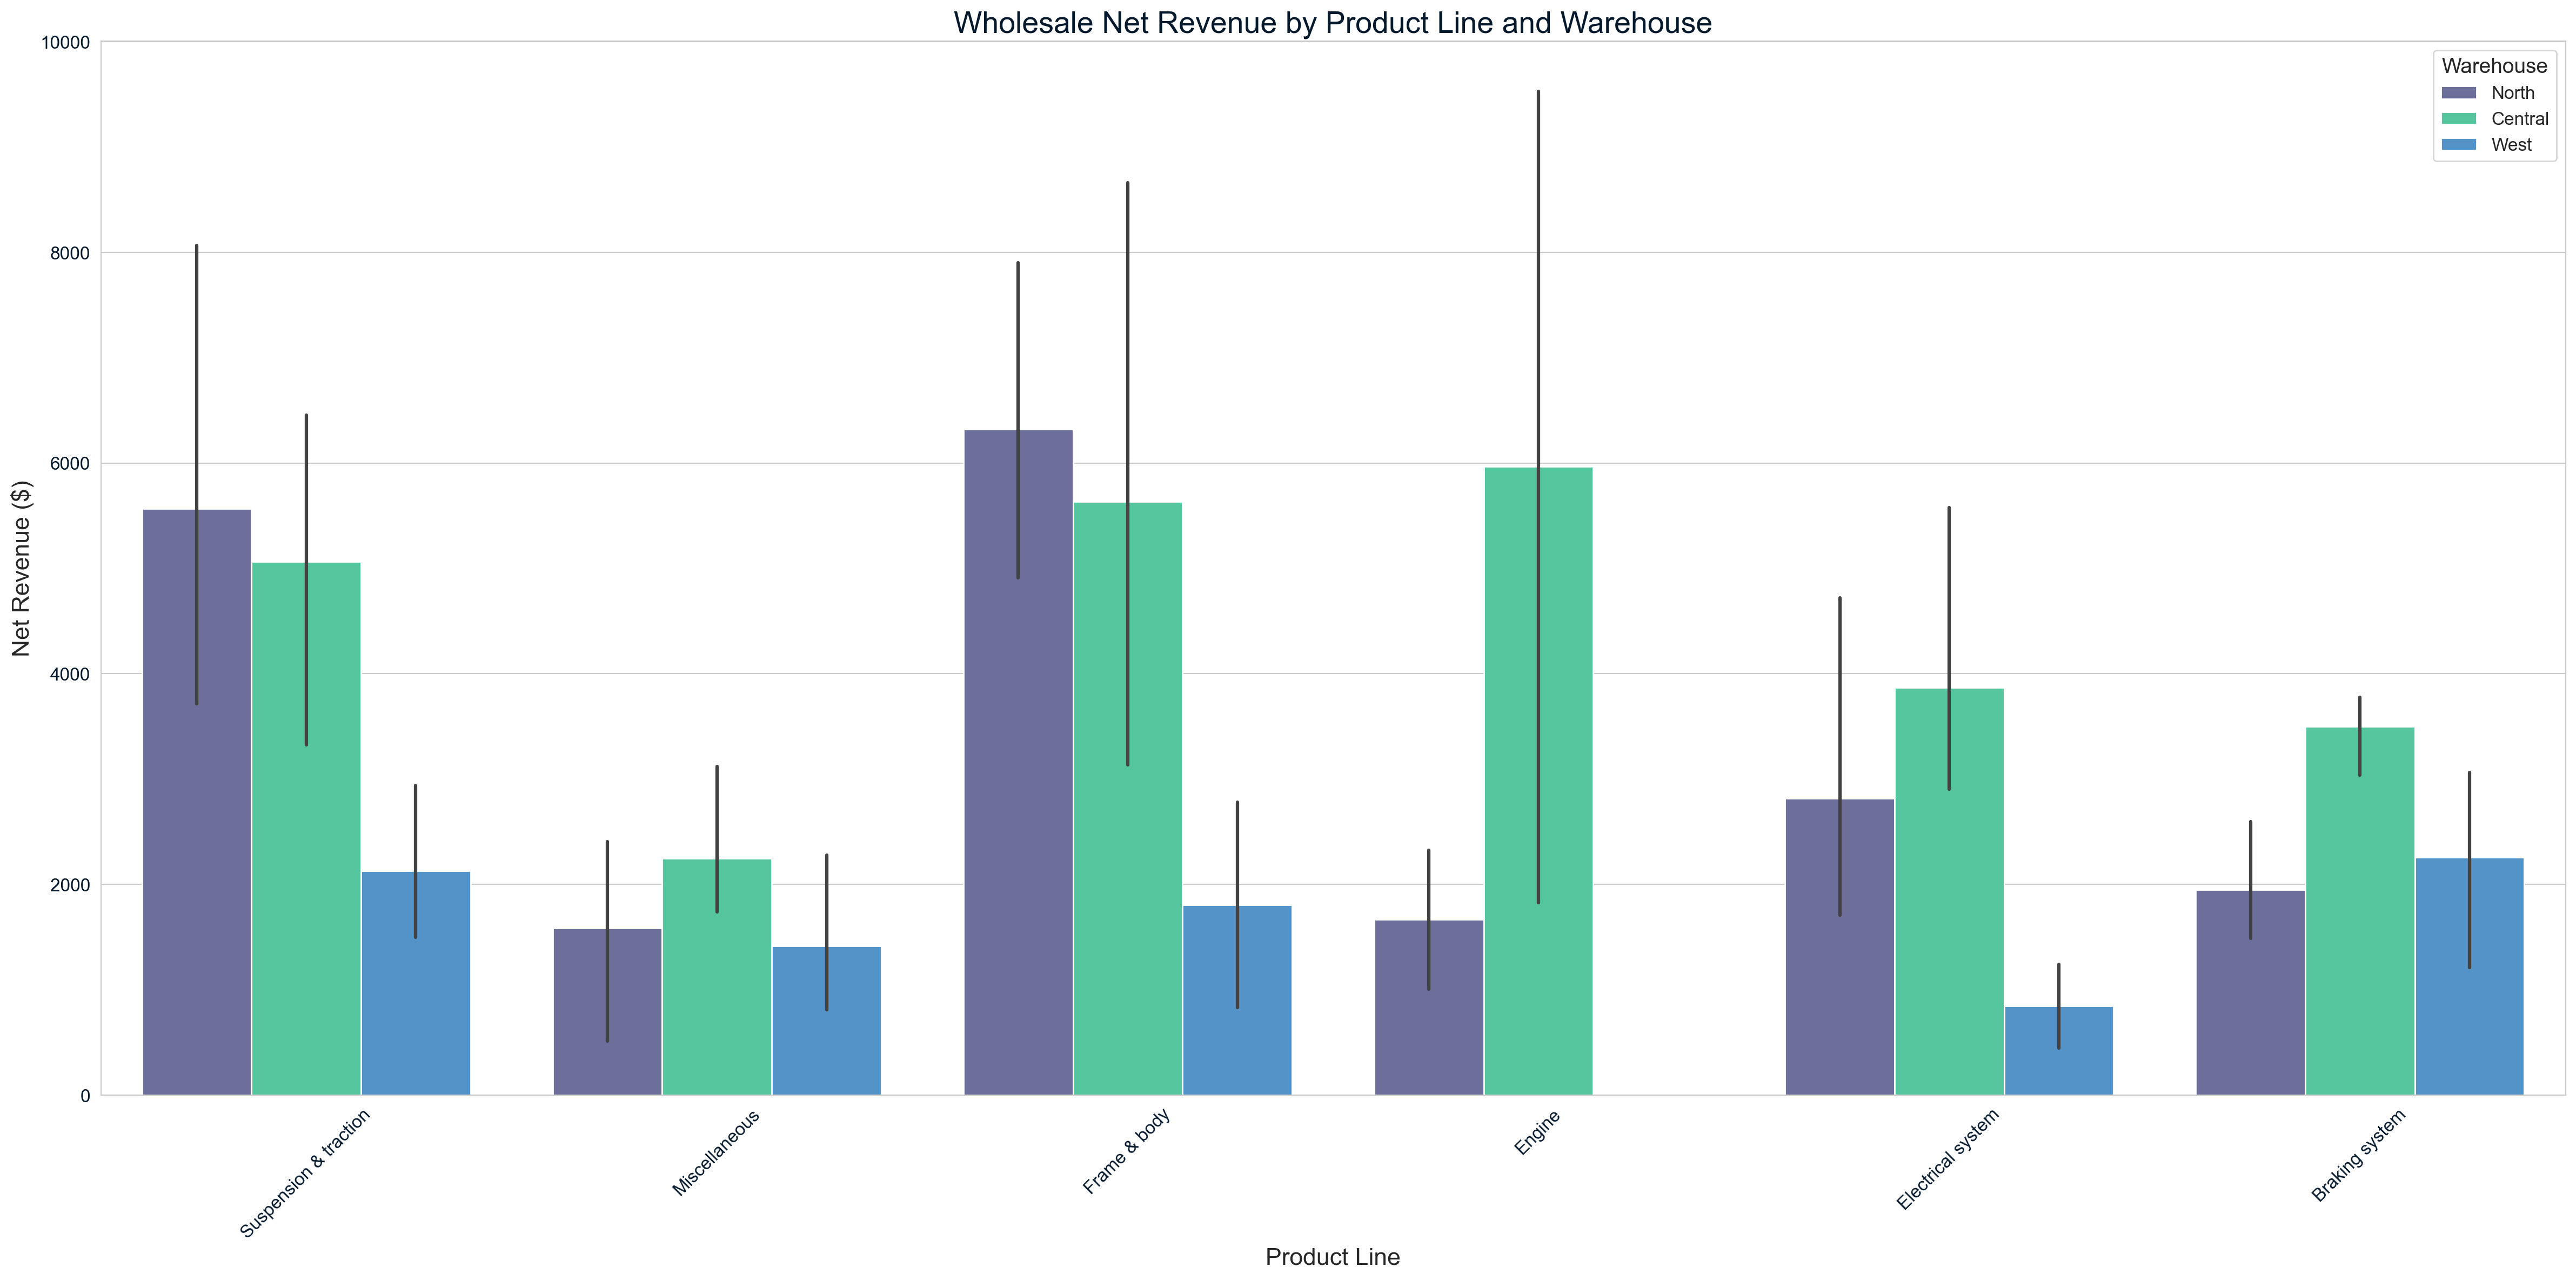

In [17]:
# ----------- 📊 FIGURE 1: Net Revenue by Product Line and Warehouse ----------- #
plt.figure(figsize=(24, 12))
sns.barplot(x='product_line', y='net_revenue', hue='warehouse', data=df_revenue)
plt.title('Wholesale Net Revenue by Product Line and Warehouse', fontsize=20)
plt.xlabel('Product Line', fontsize=16)
plt.ylabel('Net Revenue ($)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Warehouse', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

### Key Insights:

- The Frame & Body and Suspension & Traction product lines generated the highest net revenue overall.

- The Central warehouse performed the strongest across most product lines, especially dominating in Engine, Electrical System, and Braking System sales.

- The North warehouse showed high revenue for Frame & Body and Suspension & Traction, but less dominance in other product lines.

- The West warehouse generally had lower sales across most product lines compared to North and Central.

- The Engine product line was a standout for the Central warehouse, with a significant spike in net revenue compared to others.

## 📈 Visual 2: Monthly Revenue Trends by Product Line

The data will be reshaped so that each product line becomes a separate line on the plot.

The revenue change month by month for each product line is tracked.

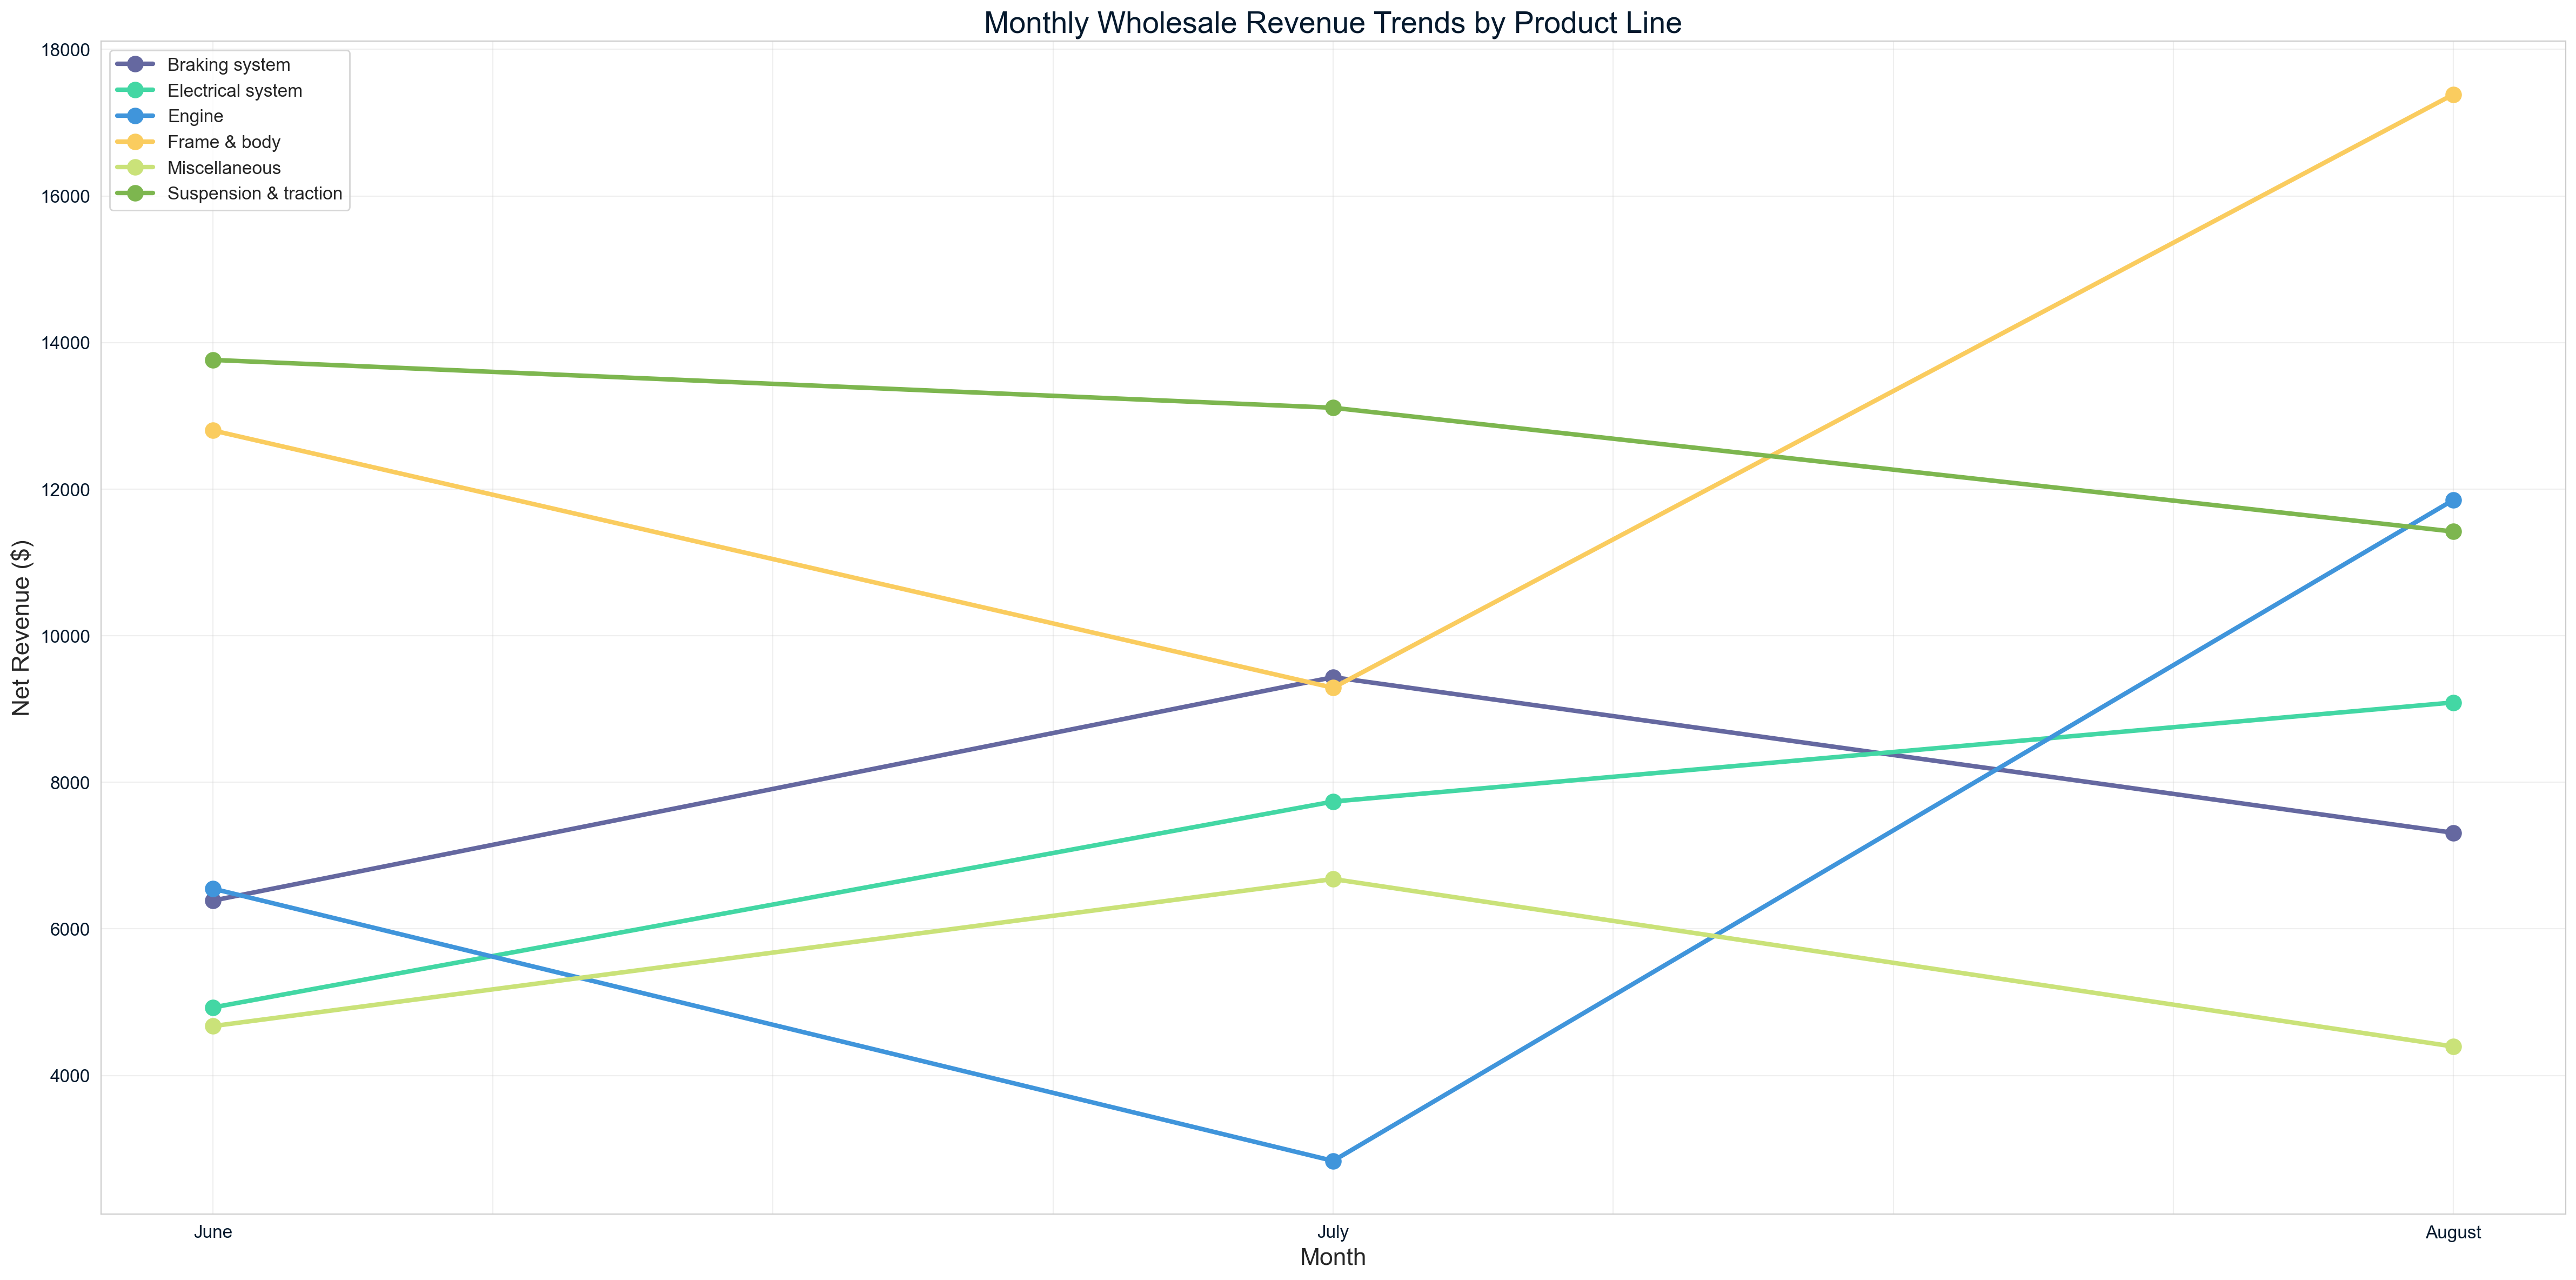

In [18]:
# ----------- 📈 FIGURE 2: Monthly Revenue Trends by Product Line ----------- #
monthly_pivot = df_revenue.pivot_table(index='month', columns='product_line', values='net_revenue', aggfunc='sum')
monthly_pivot = monthly_pivot.reindex(['June', 'July', 'August'])

#plt.figure()
monthly_pivot.plot(kind='line', marker='o', linewidth=3, markersize=10, figsize=(24, 12))
plt.title('Monthly Wholesale Revenue Trends by Product Line', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Net Revenue ($)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

### Key Insights:

- Most product lines show relatively stable sales across the summer months.

- Frame & Body and Engine parts experienced slight growth during July before stabilizing.

- Suspension & Traction had a noticeable decline in August.

- Miscellaneous parts stayed consistently low without much fluctuation.

## 📊 Visual 3: Net Revenue Distribution by Warehouse and Product Line
Grouped the data again by warehouse and product line.

Created a stacked bar chart showing how different products contributed to the total revenue of each warehouse.

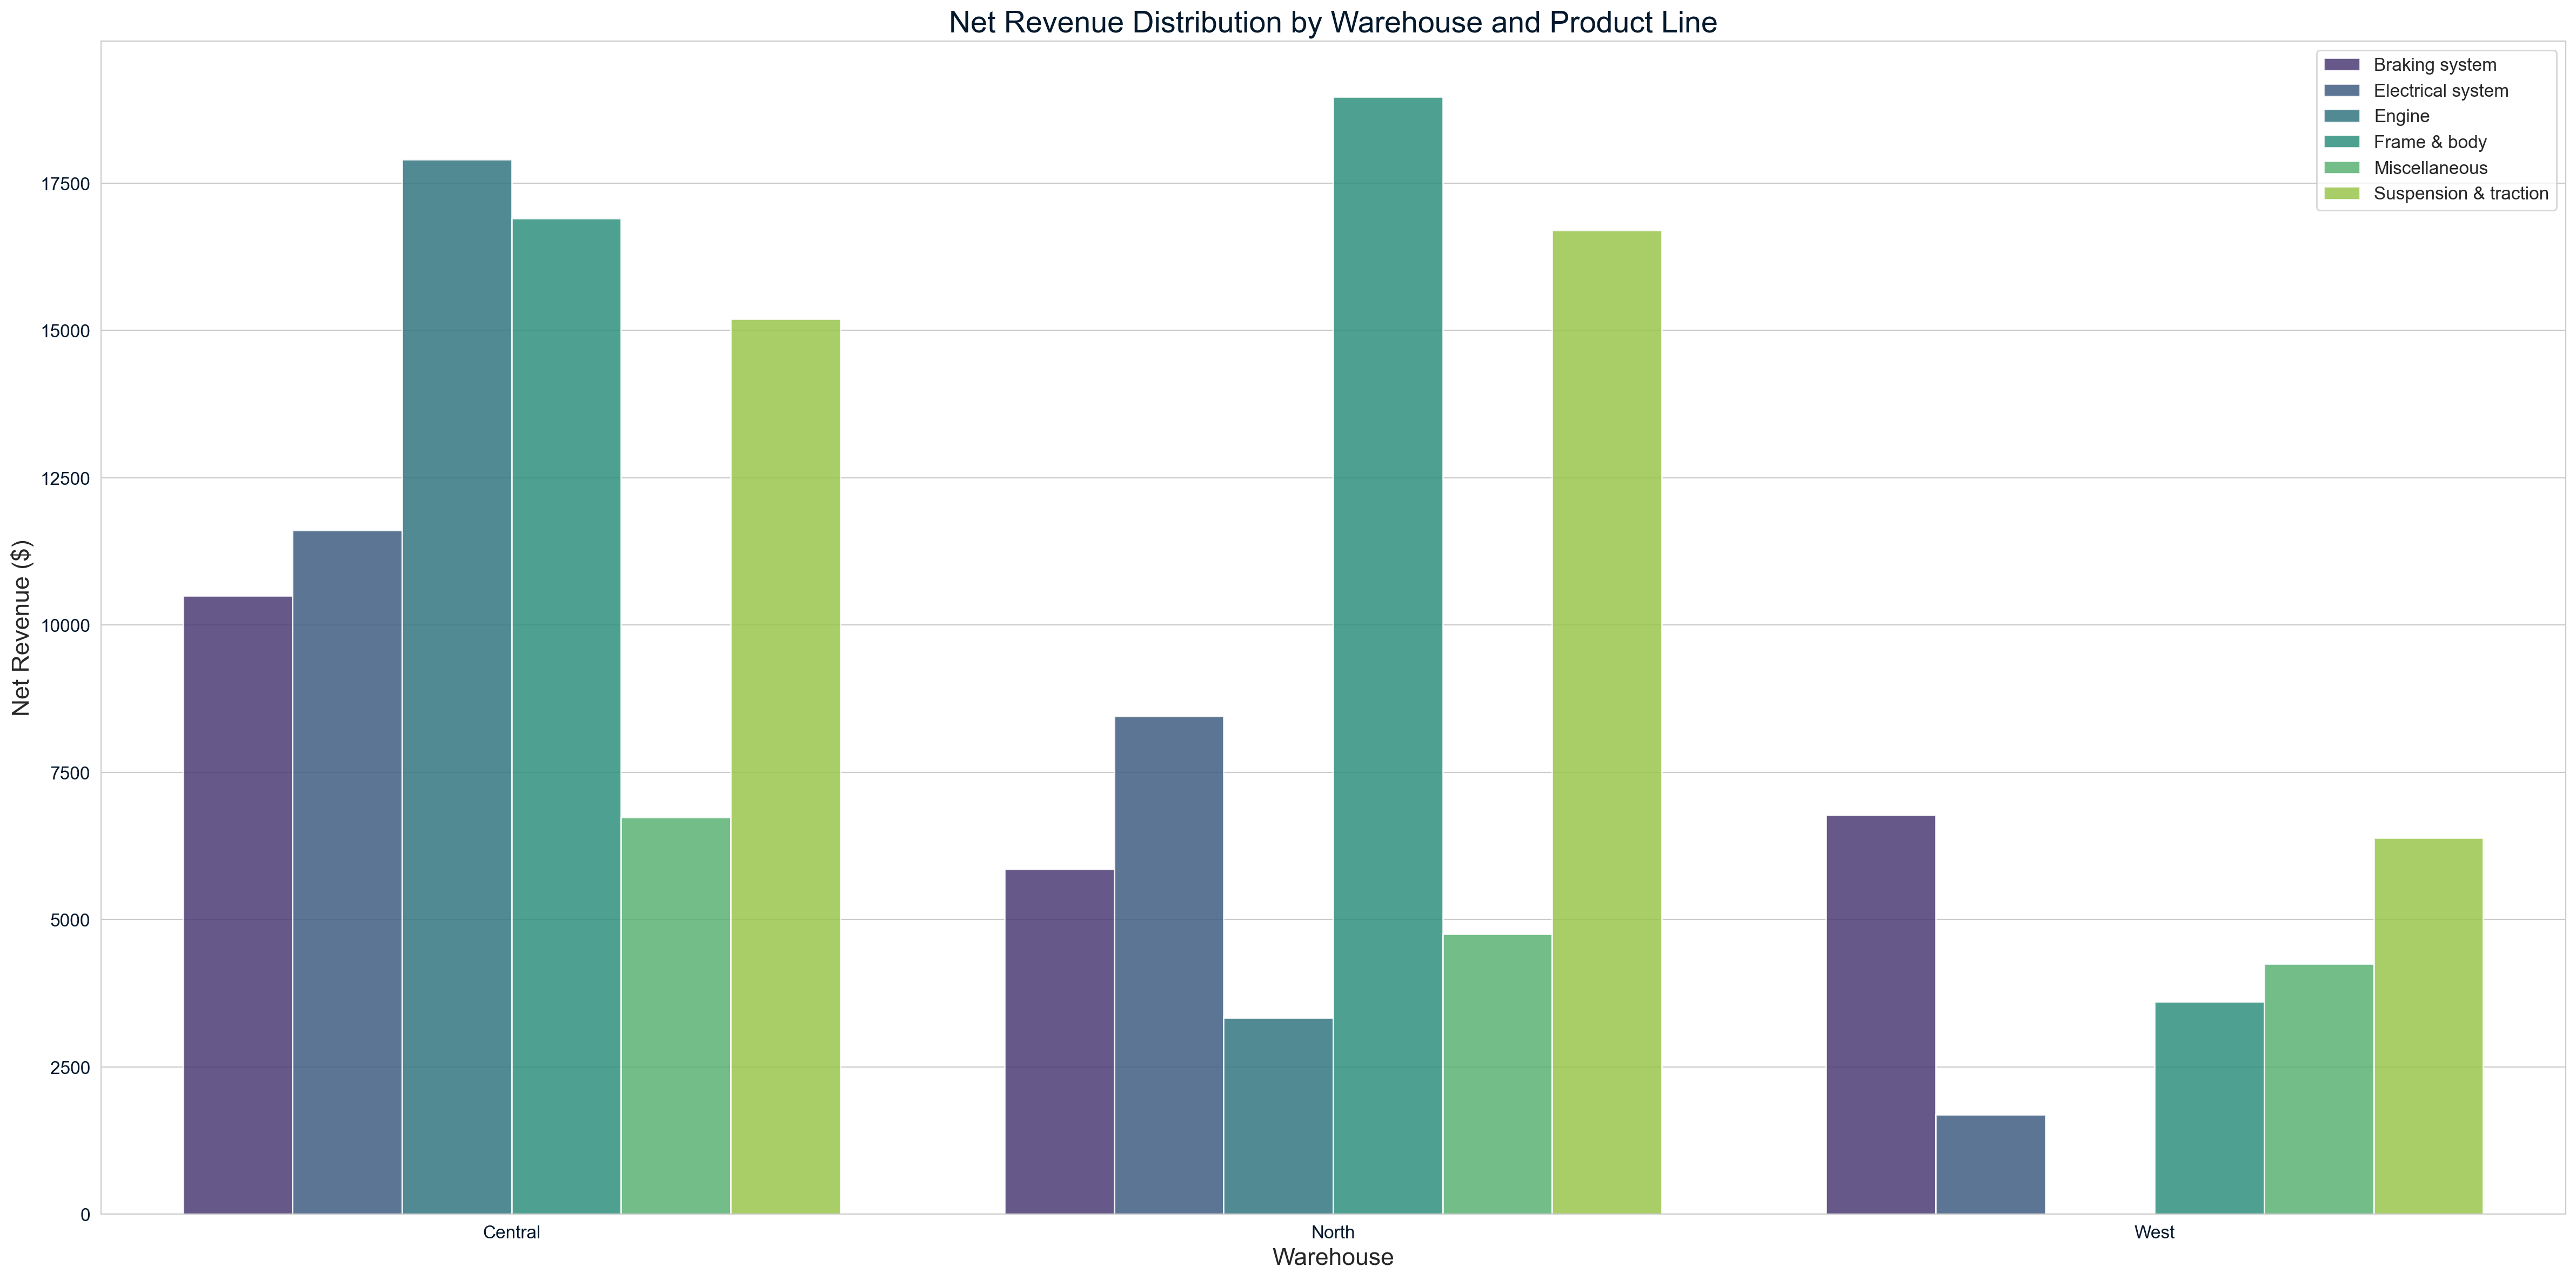

In [19]:
# ----------- 📊 FIGURE 3: Product Line Revenue by Warehouse ----------- #
warehouse_product = df_revenue.groupby(['warehouse', 'product_line'])['net_revenue'].sum().reset_index()

plt.figure(figsize=(24, 12))
sns.barplot(data=warehouse_product, x='warehouse', y='net_revenue', hue='product_line', palette='viridis', alpha=0.85)
plt.title('Net Revenue Distribution by Warehouse and Product Line', fontsize=20)
plt.xlabel('Warehouse', fontsize=16)
plt.ylabel('Net Revenue ($)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

### Key Insights:

- Central warehouse has the most diverse and evenly distributed product line sales.

- North warehouse is dominated by a few top product lines (Frame & Body and Suspension & Traction).

- West warehouse revenue is heavily concentrated into a couple of categories, indicating less variety in sales.

## 🏁 Final Summary
### ✨ Project Recap:
In this analysis, we explored wholesale motorcycle parts sales across three warehouses between June and August. We:

- Filtered for only wholesale orders.

- Calculated net revenue by adjusting for payment method fees.

- Visualized revenue patterns across time, warehouses, and product lines.

### 🔑 Main Takeaways:

- Central warehouse is the overall leader in sales performance.

- Frame & Body and Suspension & Traction are the star product lines.

- Sales trends are relatively steady, with minor variations across months.

- Some warehouses specialize more in certain products — an important clue for inventory and marketing strategies.

### 🚀 Next Steps:
If this were a real project continuation, I could recommend:

- Targeting marketing campaigns for growing product lines.

- Investigating why the West warehouse underperforms.

- Using monthly trends to plan stocking levels more accurately.